In [6]:
import pandas as pd
import glob
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

# Data Perprocessing Starts

In [7]:
all_folders = [x[0] for x in os.walk(r"C:\Users\USER\Desktop\CE888-ASSIGNMENT\Stress-Predict-Dataset-main\Raw_data")]

#only selecting the necessary folders which contains subject s01 to subject s35 data
all_folders = all_folders[1:]

pre = pd.read_csv(r'C:\Users\USER\Desktop\CE888-ASSIGNMENT\Stress-Predict-Dataset-main\Processed_data\Improved_All_Combined_hr_rsp_binary.csv')
pre.rename({'Time(sec)':'merger'},axis = 1,inplace = True)

In [8]:
all_folders

['C:\\Users\\USER\\Desktop\\CE888-ASSIGNMENT\\Stress-Predict-Dataset-main\\Raw_data\\S01',
 'C:\\Users\\USER\\Desktop\\CE888-ASSIGNMENT\\Stress-Predict-Dataset-main\\Raw_data\\S02',
 'C:\\Users\\USER\\Desktop\\CE888-ASSIGNMENT\\Stress-Predict-Dataset-main\\Raw_data\\S03',
 'C:\\Users\\USER\\Desktop\\CE888-ASSIGNMENT\\Stress-Predict-Dataset-main\\Raw_data\\S04',
 'C:\\Users\\USER\\Desktop\\CE888-ASSIGNMENT\\Stress-Predict-Dataset-main\\Raw_data\\S05',
 'C:\\Users\\USER\\Desktop\\CE888-ASSIGNMENT\\Stress-Predict-Dataset-main\\Raw_data\\S06',
 'C:\\Users\\USER\\Desktop\\CE888-ASSIGNMENT\\Stress-Predict-Dataset-main\\Raw_data\\S07',
 'C:\\Users\\USER\\Desktop\\CE888-ASSIGNMENT\\Stress-Predict-Dataset-main\\Raw_data\\S08',
 'C:\\Users\\USER\\Desktop\\CE888-ASSIGNMENT\\Stress-Predict-Dataset-main\\Raw_data\\S09',
 'C:\\Users\\USER\\Desktop\\CE888-ASSIGNMENT\\Stress-Predict-Dataset-main\\Raw_data\\S10',
 'C:\\Users\\USER\\Desktop\\CE888-ASSIGNMENT\\Stress-Predict-Dataset-main\\Raw_data\\S11',

In [9]:
count = 0
final_data = pd.DataFrame()
testing_data = pd.DataFrame()

for i in all_folders:

    files = []
    for j in glob.glob(i + "/*.csv"):
        files.append(j)
        
    acc = pd.read_csv(files[0])
    bvp = pd.read_csv(files[1])
    eda = pd.read_csv(files[2])
    hr = pd.read_csv(files[3])
    ibi = pd.read_csv(files[4])
    temp = pd.read_csv(files[6])
    
    acc['merger'] = 0
    bvp['merger'] = 0
    hr['merger'] = 0
    eda['merger'] = 0
    ibi['merger'] = 0
    temp['merger'] = 0
    
    acc['merger'] = int(float(acc.columns[0]))
    bvp['merger'] = int(float(bvp.columns[0]))
    eda['merger'] = int(float(eda.columns[0]))
    hr['merger'] = int(float(hr.columns[0]))
    ibi['merger'] = int(float(ibi.columns[0]))
    temp['merger'] = int(float(temp.columns[0]))
    
    acc.reset_index(inplace = True)
    bvp.reset_index(inplace = True)
    hr.reset_index(inplace = True)
    ibi.reset_index(inplace = True)
    temp.reset_index(inplace = True)
    eda.reset_index(inplace = True)
    
    acc['merger'] = acc['merger']+acc['index']
    bvp['merger'] = bvp['merger']+bvp['index']
    ibi['merger'] = ibi['merger']+ibi['index']
    eda['merger'] = eda['merger']+eda['index']
    temp['merger'] = temp['merger']+temp['index']
    hr['merger'] = hr['merger']+hr['index']
    
    acc.drop('index',axis = 1,inplace = True)
    bvp.drop('index',axis = 1,inplace = True)
    hr.drop('index',axis = 1,inplace = True)
    ibi.drop('index',axis = 1,inplace = True)
    temp.drop('index',axis = 1,inplace = True)
    eda.drop('index',axis = 1,inplace = True)
    
    acc.rename({acc.columns[0]:'X',acc.columns[1]:'Y',acc.columns[2]:'Z'},axis = 1,inplace = True)
    bvp.rename({bvp.columns[0]:'bvp'},axis = 1,inplace = True)
    hr.rename({hr.columns[0]:'hr'},axis = 1,inplace = True)
    ibi.rename({ibi.columns[0]:'IBI0'},axis = 1,inplace = True)
    temp.rename({temp.columns[0]:'temp'},axis = 1,inplace = True)
    eda.rename({eda.columns[0]:'eda'},axis = 1,inplace = True)
    
    final = acc.merge(bvp,on = 'merger',how = 'outer').merge(hr,on = 'merger',how = 'outer').merge(ibi,on = 'merger',how = 'outer').merge(temp,on = 'merger',how = 'outer').merge(eda,on = 'merger',how = 'outer')
    
    def dt(x):
        return datetime.datetime.fromtimestamp(x)

    final['datetime'] = final['merger'].apply(dt)
    
    final.reset_index(inplace = True, drop = True)
    
    final.fillna(method='ffill',inplace = True)
    final.fillna(method='bfill',inplace = True)
    
    final = final.merge(pre[['merger','Label']],on = 'merger',how = 'inner')
    
    if count == 0:
        testing_data = testing_data.append(final)
    else:
        final_data = final_data.append(final)
    final_data.reset_index(inplace = True, drop = True)

    count = count + 1
    print('Subject', count,'is done')

Subject 1 is done
Subject 2 is done
Subject 3 is done
Subject 4 is done
Subject 5 is done
Subject 6 is done
Subject 7 is done
Subject 8 is done
Subject 9 is done
Subject 10 is done
Subject 11 is done
Subject 12 is done
Subject 13 is done
Subject 14 is done
Subject 15 is done
Subject 16 is done
Subject 17 is done
Subject 18 is done
Subject 19 is done
Subject 20 is done
Subject 21 is done
Subject 22 is done
Subject 23 is done
Subject 24 is done
Subject 25 is done
Subject 26 is done
Subject 27 is done
Subject 28 is done
Subject 29 is done
Subject 30 is done
Subject 31 is done
Subject 32 is done
Subject 33 is done
Subject 34 is done
Subject 35 is done


In [5]:
testing_data.to_csv('test.csv',index = False)
final_data.to_csv('preprocessed.csv',index = False)

# Data Preprocessing Ends

In [10]:
import pandas as pd
import glob
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [11]:
train = pd.read_csv('preprocessed.csv')
test = pd.read_csv('test.csv')

In [12]:
train.head()

,X,Y,Z,merger,bvp,hr,IBI0,IBI,temp,eda,datetime,Label
0,-12.0,10.0,69.0,1644227583,-0.00,1.0,684.953125,0.812500,34.79,0.667881,2022-02-07 09:53:03,0
1,-9.0,11.0,72.0,1644227584,-0.00,1.0,718.156250,0.718750,34.79,0.660192,2022-02-07 09:53:04,0
2,-8.0,10.0,70.0,1644227585,0.00,118.0,718.984375,0.828125,34.79,0.664036,2022-02-07 09:53:05,0
3,-7.0,9.0,63.0,1644227586,0.01,113.5,719.750000,0.765625,34.79,0.666599,2022-02-07 09:53:06,0
4,-6.0,9.0,60.0,1644227587,0.01,93.0,720.546875,0.796875,34.68,0.669162,2022-02-07 09:53:07,0


In [13]:
test.head()

,X,Y,Z,merger,bvp,hr,IBI0,IBI,temp,eda,datetime,Label
0,-17.0,17.0,59.0,1644227583,-12.38,69.52,2856.46875,1.21875,28.47,0.231907,2022-02-07 09:53:03,0
1,-16.0,17.0,59.0,1644227584,-7.21,68.98,2856.46875,1.21875,28.47,0.233188,2022-02-07 09:53:04,0
2,-16.0,17.0,59.0,1644227585,-1.68,68.42,2856.46875,1.21875,28.47,0.233188,2022-02-07 09:53:05,0
3,-15.0,17.0,59.0,1644227586,3.98,67.92,2856.46875,1.21875,28.45,0.235751,2022-02-07 09:53:06,0
4,-15.0,17.0,59.0,1644227587,9.56,67.45,2856.46875,1.21875,28.45,0.230626,2022-02-07 09:53:07,0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498629 entries, 0 to 498628
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   X         498629 non-null  float64
 1   Y         498629 non-null  float64
 2   Z         498629 non-null  float64
 3   merger    498629 non-null  int64  
 4   bvp       498629 non-null  float64
 5   hr        498629 non-null  float64
 6   IBI0      498629 non-null  float64
 7    IBI      498629 non-null  float64
 8   temp      498629 non-null  float64
 9   eda       498629 non-null  float64
 10  datetime  498629 non-null  object 
 11  Label     498629 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 45.7+ MB


In [15]:
train.duplicated().sum()

58387

In [16]:
test.duplicated().sum()

751

In [17]:
#dropping duplicates
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

In [18]:
train.describe()

,X,Y,Z,merger,bvp,hr,IBI0,IBI,temp,eda,Label
count,440242.000000,440242.000000,440242.000000,4.402420e+05,440242.000000,440242.000000,440242.000000,440242.000000,440242.000000,440242.000000,440242.000000
mean,-27.951395,-3.245067,43.464301,1.645848e+09,-0.112632,78.686827,2980.925928,0.804448,30.485578,0.787679,0.358212
std,24.301208,15.287176,24.988929,7.880903e+05,74.217219,13.833473,689.021106,0.157448,2.773934,1.174331,0.479475
min,-128.000000,-111.000000,-95.000000,1.644228e+09,-1382.970000,1.000000,11.843750,0.312500,4.000000,0.000000,0.000000
25%,-46.000000,-11.000000,34.000000,1.645444e+09,-14.470000,68.830000,3091.187500,0.703125,28.670000,0.167854,0.000000
50%,-28.000000,-3.000000,54.000000,1.646052e+09,1.200000,75.580000,3176.156250,0.796875,30.610000,0.306220,0.000000
75%,-14.000000,3.000000,60.000000,1.646666e+09,16.190000,86.050000,3299.843750,0.875000,32.210000,0.926738,1.000000
max,93.000000,121.000000,127.000000,1.646842e+09,1822.090000,146.780000,3542.312499,1.703125,36.390000,9.366458,1.000000


In [20]:
train.corr()

,X,Y,Z,merger,bvp,hr,IBI0,IBI,temp,eda,Label
X,1.000000,0.198349,0.502064,0.071355,-0.001503,0.239463,-0.029029,-0.149456,-0.325885,-0.077927,0.002447
Y,0.198349,1.000000,-0.033654,0.081572,-0.000535,-0.010597,-0.110018,-0.177673,-0.207298,0.060853,-0.018596
Z,0.502064,-0.033654,1.000000,-0.028942,-0.004511,0.004627,-0.025531,0.033454,-0.009968,0.016891,0.016321
merger,0.071355,0.081572,-0.028942,1.000000,-0.000205,0.032255,0.066731,-0.096260,-0.251311,-0.301470,0.004648
bvp,-0.001503,-0.000535,-0.004511,-0.000205,1.000000,-0.003715,0.000766,0.000224,-0.000396,0.002222,-0.001841
hr,0.239463,-0.010597,0.004627,0.032255,-0.003715,1.000000,-0.006738,-0.553220,-0.390922,0.068351,0.021505
IBI0,-0.029029,-0.110018,-0.025531,0.066731,0.000766,-0.006738,1.000000,0.097077,-0.037855,0.041618,0.011763
IBI,-0.149456,-0.177673,0.033454,-0.096260,0.000224,-0.553220,0.097077,1.000000,0.409321,0.072217,-0.010102
temp,-0.325885,-0.207298,-0.009968,-0.251311,-0.000396,-0.390922,-0.037855,0.409321,1.000000,0.116660,-0.001777
eda,-0.077927,0.060853,0.016891,-0.301470,0.002222,0.068351,0.041618,0.072217,0.116660,1.000000,0.001260


<Axes: >

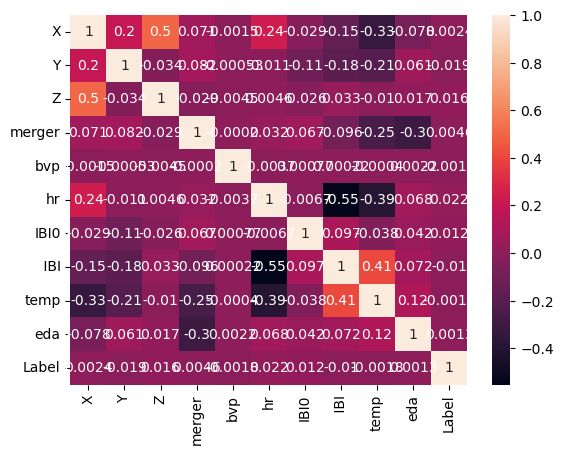

In [21]:
sns.heatmap(train.corr(),annot = True)

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'Z'}>],
       [<AxesSubplot:title={'center':'merger'}>,
        <AxesSubplot:title={'center':'bvp'}>,
        <AxesSubplot:title={'center':'hr'}>],
       [<AxesSubplot:title={'center':'IBI0'}>,
        <AxesSubplot:title={'center':' IBI'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'eda'}>,
        <AxesSubplot:title={'center':'Label'}>, <AxesSubplot:>]],
      dtype=object)

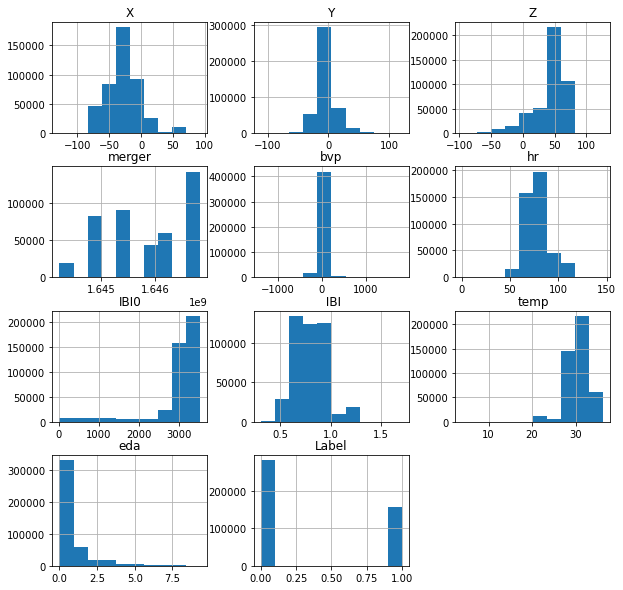

In [211]:
#checking skewed data
train.hist(figsize = (10,10))

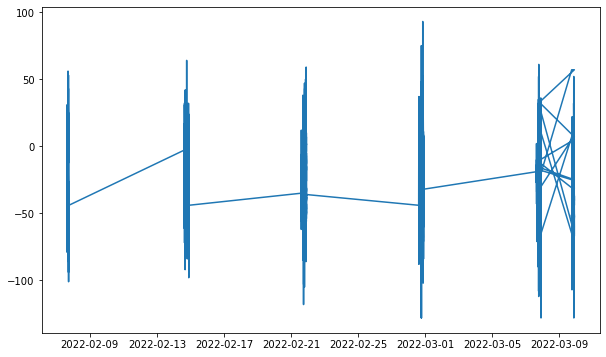

In [214]:
plt.figure(figsize=(10, 6))

# Plot the timeseries data
print(plt.plot(final_data.datetime, final_data.X))

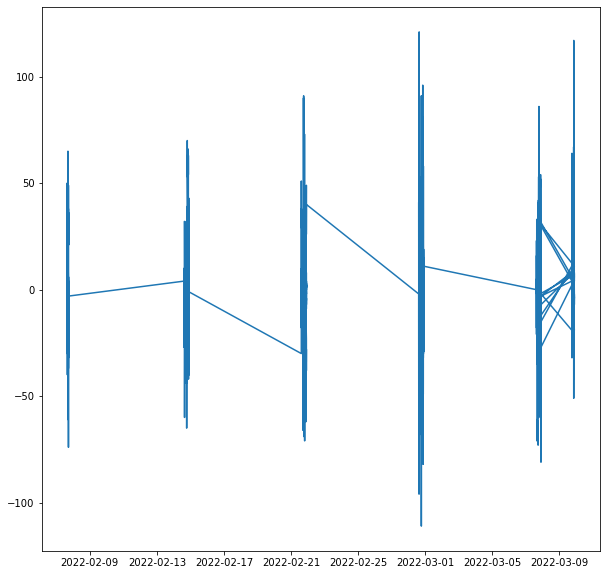

In [216]:
plt.figure(figsize=(10, 10))

print(plt.plot(final_data.datetime, final_data.Y))

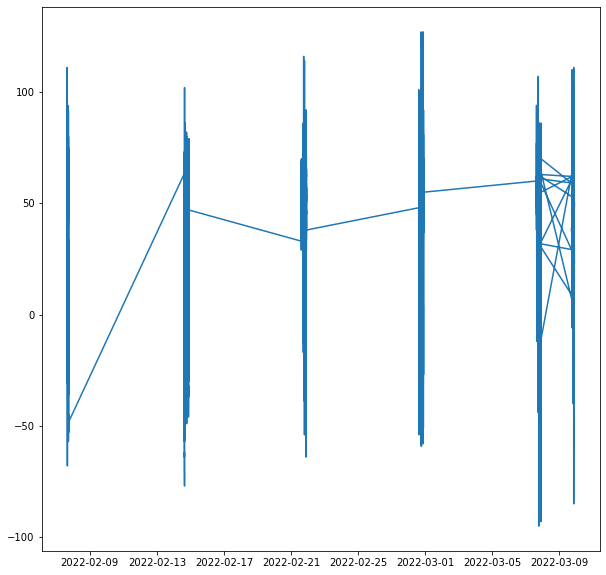

In [217]:
plt.figure(figsize=(10, 10))

print(plt.plot(final_data.datetime, final_data.Z))

In [22]:
train['Label'].value_counts()

0    282542
1    157700
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

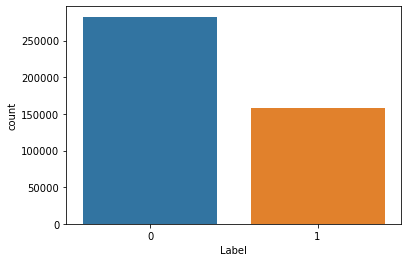

In [219]:
#checking the label counts
sns.countplot(train['Label'])

# Resampling

In [23]:
#downsampling the data
from sklearn.utils import resample

df_A = train[train['Label'] == 0]
df_B = train[train['Label'] == 1]

df_A_downsampled = resample(df_A, replace=False, n_samples=len(df_B), random_state=100)
train = pd.concat([df_A_downsampled, df_B])

In [24]:
train['Label'].value_counts()

0    157700
1    157700
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

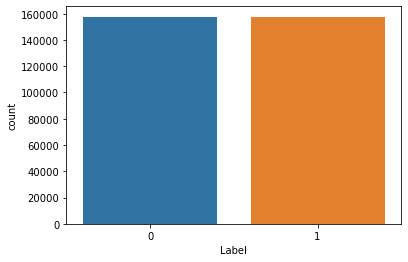

In [222]:
sns.countplot(train['Label'])

# train test split

In [25]:
#splitting the data
from sklearn.model_selection import train_test_split

X = train.drop({'merger','Label','datetime'},axis = 1)
y = train['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [26]:
X_train.shape, y_train.shape

((211318, 9), (211318,))

In [29]:
X_test.shape, y_test.shape

((104082, 9), (104082,))

# Model building

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred1 = clf.predict(X_test)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.51      0.46      0.49     52047
           1       0.51      0.56      0.53     52035

    accuracy                           0.51    104082
   macro avg       0.51      0.51      0.51    104082
weighted avg       0.51      0.51      0.51    104082



In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred1)

array([[24091, 27956],
       [22940, 29095]], dtype=int64)

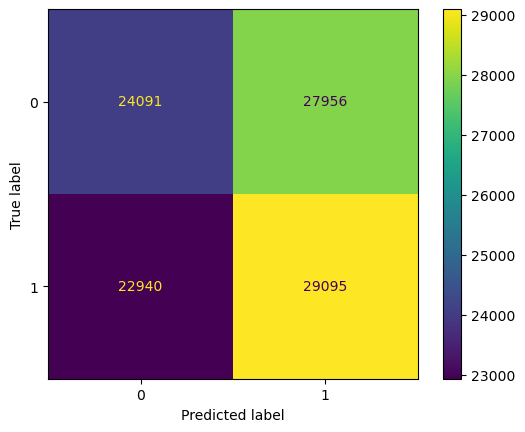

In [46]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred2 = clf1.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.60      0.26      0.37     52047
           1       0.53      0.83      0.64     52035

    accuracy                           0.54    104082
   macro avg       0.57      0.54      0.51    104082
weighted avg       0.57      0.54      0.51    104082



In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred2)

array([[13731, 38316],
       [ 9084, 42951]], dtype=int64)

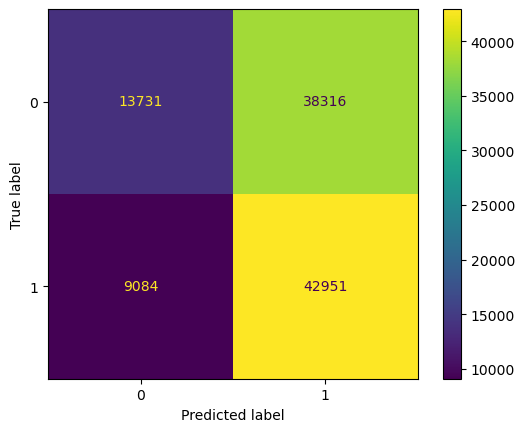

In [47]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

# Naive bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

clf2 = GaussianNB().fit(X_train, y_train)
y_pred3 = clf2.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.53      0.26      0.35     52047
           1       0.51      0.77      0.61     52035

    accuracy                           0.51    104082
   macro avg       0.52      0.51      0.48    104082
weighted avg       0.52      0.51      0.48    104082



In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred3)

array([[13392, 38655],
       [12086, 39949]], dtype=int64)

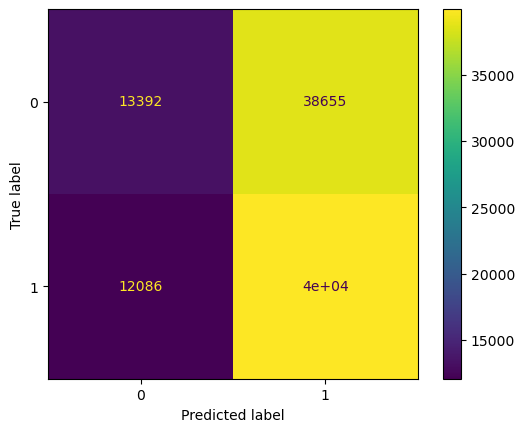

In [48]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

# Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

clf3 = GradientBoostingClassifier().fit(X_train, y_train)
y_pred4 = clf3.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60     52047
           1       0.60      0.62      0.61     52035

    accuracy                           0.60    104082
   macro avg       0.60      0.60      0.60    104082
weighted avg       0.60      0.60      0.60    104082



In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred4)

array([[30590, 21457],
       [19960, 32075]], dtype=int64)

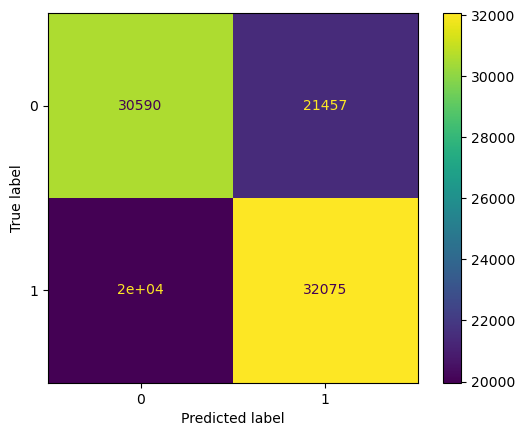

In [49]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred4)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [231]:
subject1 = clf1.predict(test.drop({'merger','Label','datetime'},axis = 1))

In [232]:
#subject1 testing
subject1

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)